In [1]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [36]:
dataset_path = "/home/andres/CAiN_repos/telemetry/11/Dataset/"
sys.path.append(dataset_path)
# Datafile names and columns
dataevents = 'events.csv'
timecol = 'timestamp'
ts = 'ts'
datafile3 = 'Cisco-IOS-XR-pfi-im-cmd-operinterfaces_interface-summary.csv.gz'
features3 = ['bytes-sent', 'bytes-received']
datafile1 = 'Cisco-show_interface.csv'
features1 = ['bytes-sent', 'bytes-received']
datafile2 = 'Cisco-show_bfd_all.csv'
features2 = ['bfd_ipv6_sessions_down', 'bfd_ipv4_sessions_up', 'bfd_ipv6_sessions_up', 'bfd_ipv6_sessions_total', 'bfd_ipv4_sessions_down', 'bfd_ipv4_sessions_total']


In [43]:
# Load data
data_events = pd.read_csv(dataset_path+dataevents)
data1 = pd.read_csv(dataset_path+datafile1)
data2 = pd.read_csv(dataset_path+datafile2)
data3 = pd.read_csv(dataset_path+datafile3)

Unnamed: 0                                                       object
EncodingPath                                                     object
Producer                                                         object
Target                                                          float64
host                                                            float64
interface-counts__admin-down-interface-count                      int64
interface-counts__down-interface-count                            int64
interface-counts__interface-count                                 int64
interface-counts__up-interface-count                              int64
interface-type__interface-counts__admin-down-interface-count      int64
interface-type__interface-counts__down-interface-count            int64
interface-type__interface-counts__interface-count                 int64
interface-type__interface-counts__up-interface-count              int64
dtype: object

In [39]:
# Shift times to start from 0
data1[ts] = (data1[ts] - min(data_events[timecol]))
data2[ts] = (data2[ts] - min(data_events[timecol]))
data3[0] = (data3[0] - min(data_events[timecol]))
data_events[timecol] = (data_events[timecol] - min(data_events[timecol]))

KeyError: 0

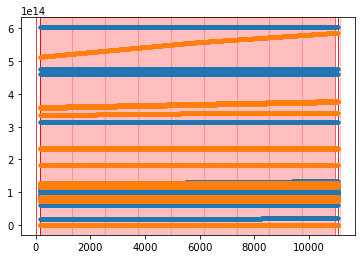

In [33]:
# Plot anomalies
fig, ax = plt.subplots()
#ax.axis([140, 300, 0, 1e15])
ax.plot(data1[ts], data1[features1], '.')
#ax.plot(data1[ts], data1[features1])
for idx, event in data_events.iterrows():
    if event['duration'] != 'NaN':
        duration = event['duration']
    else:
        duration = 1
    ax.axvspan(event[timecol], event[timecol] + duration, alpha=0.25, color='red')

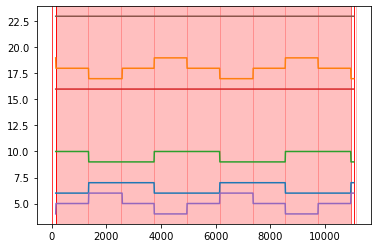

In [34]:
# Plot anomalies
fig, ax = plt.subplots()
#ax.axis([0, 2000, 0, 300])
ax.plot(data2[ts], data2[features2])
for idx, event in data_events.iterrows():
    if event['duration'] != 'NaN':
        duration = event['duration']
    else:
        duration = 1
    ax.axvspan(event[timecol], event[timecol] + duration, alpha=0.25, color='red')

In [ ]:
# Group repeated time entries, and apply aggregator_funcs to overlapping fields
agg_telemetry=telemetry.groupby(telemetry['time']).aggregate(aggregator_funcs)

In [ ]:
# Tag anomaly times (from casedata file)
agg_telemetry['anomaly'] = 0 # add new column
anomaly_minutes = [(5,7), (10, 12), (15,17), (20, 23), (25, 28)] # from casedata
shift = 2 # number of minutes "ground truth" is shifted
anomaly_seconds = [((i-shift) * 60, (j-shift) * 60) for i,j in anomaly_minutes] # convert to seconds

# flag entries within anomaly ranges
for i in anomaly_seconds:
    mask = agg_telemetry['time'].between(i[0], i[1])
    agg_telemetry['anomaly'] = agg_telemetry.anomaly.mask(mask, 1)

In [ ]:
agg_telemetry[agg_telemetry.anomaly==1]

In [ ]:
agg_telemetry.head()

In [ ]:
agg_telemetry.tail()

In [ ]:
agg_telemetry[0:].to_csv('embeddings3_shifted.txt', index=False, columns=sum_cols + avg_cols + max_cols, header=False, na_rep=0, sep='\t')

In [ ]:
agg_telemetry[0:].to_csv('labels3_shifted.txt', index=False, columns=['time', 'name', 'anomaly', 'Producer'], header=True, na_rep=0, sep='\t')

In [ ]:
agg_telemetry.size()